<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Get-Data" data-toc-modified-id="Get-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li></ul></div>

## Import Modules

In [121]:


# Table libraries
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
import pickle


# Web scrapping libraries 
import lxml.html as lh
from bs4 import BeautifulSoup
import requests

# Other libraries
import os, sys
import re
import time
import csv


# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

py.init_notebook_mode(connected=True)
import folium 
#from folium import plugins
#plt.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

## Functions

In [4]:
# Highlight Max Numbers

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: pink' if v else '' for v in is_max]

In [144]:
query = (ca_data_df['Province']!='\xa0Repatriated travellers')
ca_data_df = ca_data_df[query]

,Province,Tests,Popul_Density_Sqkm,Confirmed,Population,Confirmed_PerMillion,Lat,Active,Deaths,Recovered,Long
5,Quebec,52844,6.293318,2498,8537674,292.6,52.9399,2447,22,29,-73.5491
9,Newfoundland and Labrador,1927,1.407140,120,521365,230.2,46.5653,116,0,4,-66.4619
0,British Columbia,38697,5.540271,884,5110917,173.0,49.2827,471,17,396,-123.1207
1,Alberta,42527,6.891982,621,4413146,140.7,53.9333,566,2,53,-116.5765
2,Saskatchewan,8248,2.139262,134,1181666,113.4,52.9399,130,0,4,-106.4509
8,Nova Scotia,4141,18.462695,110,977457,112.5,44.6820,107,0,3,-63.7443
10,Yukon,603,0.086532,4,41078,97.4,64.2823,4,0,0,-135.0000
4,Ontario,43072,16.189983,1144,14711827,77.8,51.2538,1117,19,8,-85.3232
7,Prince Edward Island,622,0.138275,11,158158,69.6,46.5107,10,0,1,-63.4168
6,New Brunswick,2605,10.925984,51,779993,65.4,46.5653,49,0,2,-66.4619


## Get Data

In [145]:
ca_data_df = pd.read_excel('Data/Covid_Canada.xlsx', 'Canada')
no_req = ['Conf.', 'Pres.', 'Land_Area_Sqkm']
ca_cols = list(ca_data_df.columns)
ca_data_df=ca_data_df[list(set(ca_cols) - set(no_req))].sort_values('Confirmed_PerMillion', ascending = False)

query = (ca_data_df['Province']!='\xa0Repatriated travellers')
ca_data_df = ca_data_df[query]

ca_data_df.head(3)

,Province,Tests,Popul_Density_Sqkm,Confirmed,Population,Confirmed_PerMillion,Lat,Active,Deaths,Recovered,Long
5,Quebec,52844,6.293318,2498,8537674,292.6,52.9399,2447,22,29,-73.5491
9,Newfoundland and Labrador,1927,1.407140,120,521365,230.2,46.5653,116,0,4,-66.4619
0,British Columbia,38697,5.540271,884,5110917,173.0,49.2827,471,17,396,-123.1207


## Exploratory Data Analysis

In [149]:
ca_data_df[['Province','Tests','Confirmed', 'Confirmed_PerMillion', 'Deaths','Active']].style.apply(highlight_max,subset=['Confirmed', 'Confirmed_PerMillion', 'Deaths','Active'])

,Province,Tests,Confirmed,Confirmed_PerMillion,Deaths,Active
5,Quebec,52844,2498,292.6,22,2447
9,Newfoundland and Labrador,1927,120,230.2,0,116
0,British Columbia,38697,884,173,17,471
1,Alberta,42527,621,140.7,2,566
2,Saskatchewan,8248,134,113.4,0,130
8,Nova Scotia,4141,110,112.5,0,107
10,Yukon,603,4,97.4,0,4
4,Ontario,43072,1144,77.8,19,1117
7,Prince Edward Island,622,11,69.6,0,10
6,New Brunswick,2605,51,65.4,0,49


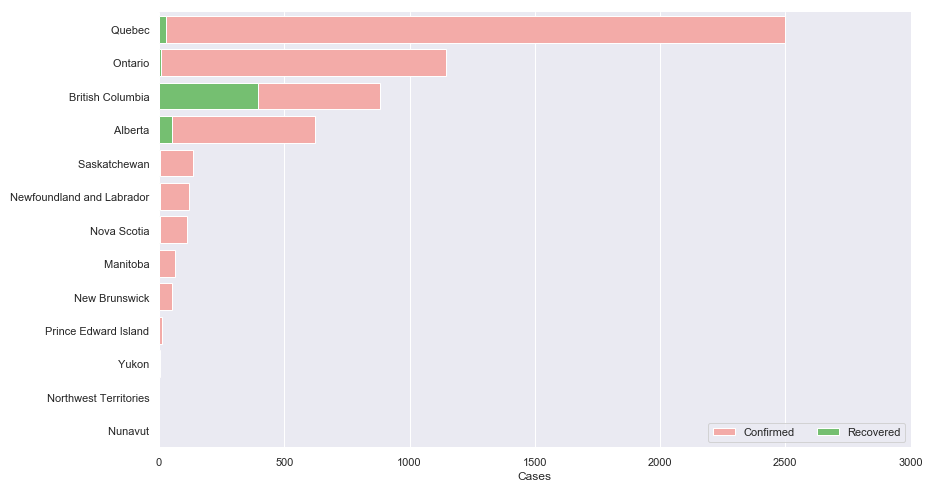

In [150]:
# Barplot with values

f, ax = plt.subplots(figsize=(12, 8))
data = ca_data_df[['Province','Confirmed','Recovered','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province", data=data, label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province", data=data, label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 3000), ylabel="", xlabel="Cases")
sns.despine(left=True, bottom=True)

In [151]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
show_values_on_bars(data, "h", 0.3)

AttributeError: 'DataFrame' object has no attribute 'patches'

In [99]:
# create map and display it
# color='#3186cc'

ca_lat, ca_long = 56.130367, -106.346771
zoom_start = 2.3

ca_map = folium.Map(location=[ca_lat, ca_long], zoom_start=zoom_start, tiles='OpenStreetMap', control_scale=True)

for lat, lon, value, name in zip(ca_data_df['Lat'], ca_data_df['Long'], ca_data_df['Confirmed'], ca_data_df['Province']):
    folium.CircleMarker([lat, lon],
                        radius=value/120,
                        popup = ('<strong>Province/Territory</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='crimson',fill=True,fill_color='crimson',line_opacity=0.5).add_to(ca_map)

ca_map

In [79]:
# create map and display it

ca_lat, ca_long = 56.130367, -106.346771
zoom_start = 2.3

ca_map = folium.Map(location=[ca_lat, ca_long], zoom_start=zoom_start, tiles='OpenStreetMap', control_scale=True)

for lat, lon, value, name in zip(ca_data_df['Lat'], ca_data_df['Long'], ca_data_df['Confirmed'],ca_data_df['Province']):
    folium.Marker(location=[lat-0.8, lon-0.8],popup=('<strong>Confirmed</strong>: ' + str(value)),icon=folium.Icon(icon='cloud')).add_to(ca_map)
    folium.Marker(location=[lat+0.5, lon+0.5],popup=('<strong>Deaths</strong>: ' + str(value)),icon=folium.Icon(color='black')).add_to(ca_map)
    folium.Marker(location=[lat, lon],popup=('<strong>Active</strong>: ' + str(value)),icon=folium.Icon(color='red', icon='info-sign')).add_to(ca_map)
    
ca_map

In [102]:
#folium_map = folium.Map(location=[38, -97],zoom_start=4.4,tiles='CartoDB dark_matter')

from folium.plugins import FastMarkerCluster, MarkerCluster

folium_map = folium.Map(location=[ca_lat, ca_long], zoom_start=zoom_start, tiles='OpenStreetMap', control_scale=True)

mc = MarkerCluster(name="Marker Cluster")

for index, row in ca_data_df.dropna().iterrows():
    popup_text = "{}<br> Active: {:,} <br> Confirmed: {:,}".format(
        index,row["Active"],row["Confirmed"]
                      )
    folium.CircleMarker(location=[row["Lat"],row["Long"]],
                        radius= 10,
                        color="red",
                        popup=popup_text,
                        fill=True).add_to(mc)

mc.add_to(folium_map)

folium.LayerControl().add_to(folium_map)
folium_map

In [86]:
for i in range(0,len(ca_data_df)):
    location=[ca_data_df.iloc[i]['Long'], ca_data_df.iloc[i]['Lat']]
    p=ca_data_df.iloc[i]['Province']
    radius=ca_data_df.iloc[i]['Confirmed']*10
    print(location, p, radius)

[-123.1207, 49.2827]  British Columbia 8840
[-116.5765, 53.9333]  Alberta 6210
[-106.4509, 52.9399]  Saskatchewan 1340
[-98.8139, 53.7609]  Manitoba 640
[-85.3232, 51.2538]  Ontario 11440
[-73.5491, 52.9399]  Quebec 24980
[-66.4619, 46.5653]  New Brunswick 510
[-63.4168, 46.5107]  Prince Edward Island 110
[-63.7443, 44.682]  Nova Scotia 1100
[-66.4619, 46.5653]  Newfoundland and Labrador 1200
[-135.0, 64.2823]  Yukon 40
[-124.8457, 64.8255]  Northwest Territories 10
[91.0, 73.0]  Nunavut 0
[0.0, 0.0]  Repatriated travellers 130
